In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [ ]:
#Install library to load data from Kaggle
#!pip install opendatasets
#import opendatasets as od
#od.download("https://www.kaggle.com/datasets/towhidultonmoy/russia-vs-ukraine-tweets-datasetdaily-updated")

In [4]:
data = pd.read_csv("filename.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1526756254022082560  1526756254022082560  2022-05-18 02:47:11 UTC   
1  1526756245687762944  1526624774067261441  2022-05-18 02:47:09 UTC   
2  1526756242240176128  1526753955807739905  2022-05-18 02:47:08 UTC   
3  1526756238922772480  1526756238922772480  2022-05-18 02:47:07 UTC   
4  1526756230521290754  1526756230521290754  2022-05-18 02:47:05 UTC   

         date      time  timezone              user_id         username  \
0  2022-05-18  02:47:11         0  1331428734595788801       koyzaa2548   
1  2022-05-18  02:47:09         0  1453990560931344387  nelsong18553950   
2  2022-05-18  02:47:08         0  1445215057378521094      andrian7979   
3  2022-05-18  02:47:07         0  1508329319705194500  pollsmatter2022   
4  2022-05-18  02:47:05         0   707780244846059524       etoptimist   

                 name place  ... geo source user_rt_id user_rt retweet_id  \
0      NO WAR 🇺🇦 🤝 🇷🇺   NaN  ... NaN   

In [5]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [6]:
data = data[["username", "tweet", "language"]]

In [7]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [8]:
data["language"].value_counts()

en     8684
pt      544
und     185
it      123
in      100
es       98
ru       49
ca       44
ja       27
da       23
de       21
zh       12
ur       11
pl       11
tl       10
fr       10
hi        9
nl        8
th        7
fi        6
ta        6
ar        5
ro        4
cs        3
no        3
uk        3
el        3
sv        2
et        2
te        1
am        1
tr        1
bg        1
ht        1
Name: language, dtype: int64

In [9]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pusp1249\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


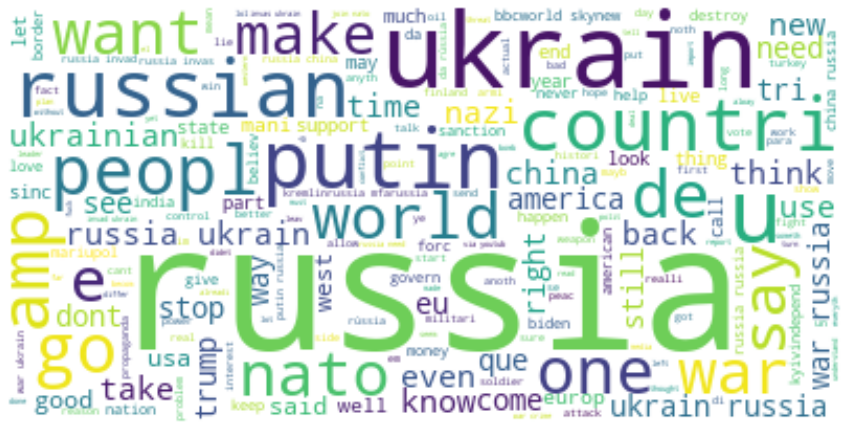

In [10]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pusp1249\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0   ทหารazov ที่นั่งดูดบุหรี่ใต้โรงเหล็กโพสความรู...     0.000     0.000   
1  puertofknrican russianembassi kremlinrussia mf...     0.083     0.295   
2        busi  indian armament made russia good luck     0.541     0.000   
3       typic fake news    russian ukrainewar russia     0.000     0.383   
4     great move russiaw need defeat globalist organ     0.339     0.248   

   Neutral  
0    1.000  
1    0.622  
2    0.459  
3    0.617  
4    0.413  


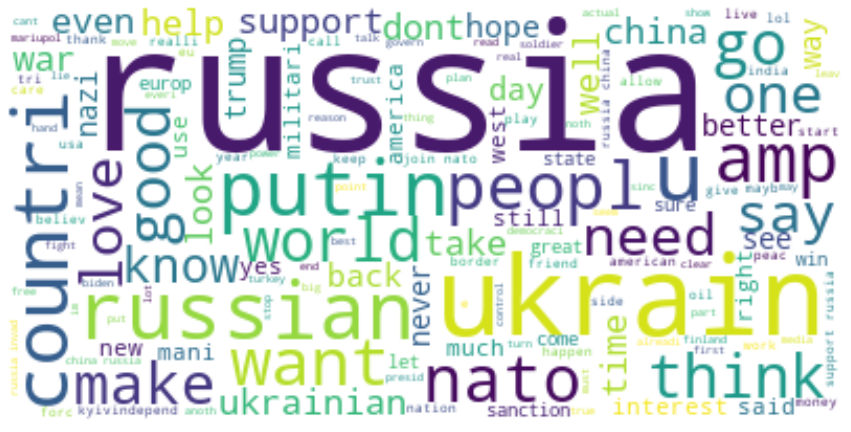

In [12]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

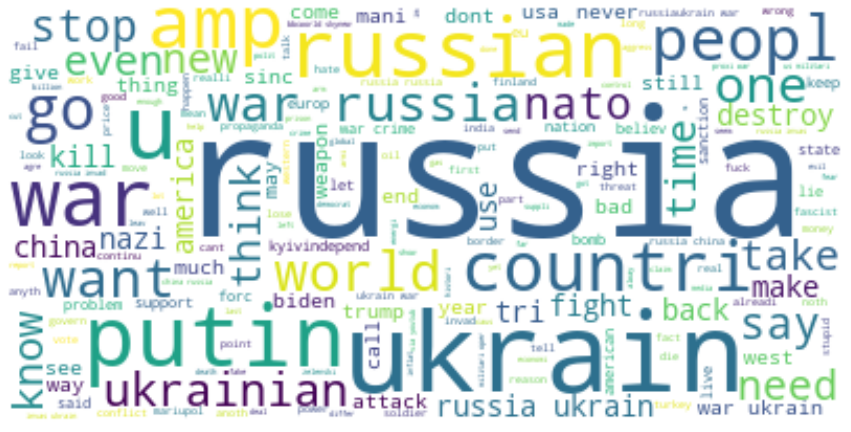

In [13]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()